## Desafío - Clasificación desde la econometría
### Camila Vera Villa - lunes 29 de julio

### Descripción

En esta sesión trabajaremos con:
* sbp : Presión Sanguínea Sistólica.
* tobacco : Promedio tabaco consumido por día.
* ldl : Lipoproteína de baja densidad.
* adiposity : Adiposidad.
* famhist : Antecedentes familiares de enfermedades cardiácas. (Binaria)
* types : Personalidad tipo A
* obesity : Obesidad.
* alcohol : Consumo actual de alcohol.
* age : edad.
* chd : Enfermedad coronaria. (dummy)

### Desafío 1: Preparar el ambiente de trabajo

* Se detallan los pasos a seguir
* tip: Los tips o sugerencias preceden de tip
* Importe las librerías y base de datos southafricanheart.csv 

In [1]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#statmodels para generar modelos de regresio
import statsmodels.api as sm
import statsmodels.formula.api as smf

#sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# graficos
plt.style.use('seaborn') 
plt.rcParams["figure.figsize"] = (6, 3) # Tamaño 
plt.rcParams["figure.dpi"] = 200 # resolución 

In [2]:
#carga del data set
df=pd.read_csv('southafricanheart.csv')
df.head()

,Unnamed: 0,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
df.shape

(462, 11)

In [4]:
df.drop(df.columns[[0]], axis=1, inplace=True) # eliminar la primera columna

In [5]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [6]:
print("La base de datos tiene ", df.shape[0], "observaciones y ", df.shape[1], " columnas")
print("Las variables de la base de datos son ", df.columns)

La base de datos tiene  462 observaciones y  10  columnas
Las variables de la base de datos son  Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')


In [7]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

### Desafío 2
A continuación se presenta el siguiente modelo a estimar:

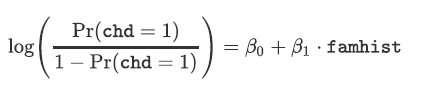

Para ello ejecute los siguientes pasos:

1. Recodifique famhist a dummy, asignando 1 a la categoría minoritaria.
2. Utilice smf.logit para estimar el modelo.
3. Implemente una función inverse_logit que realice el mapeo de log-odds a probabilidad.
4. Con el modelo estimado, responda lo siguiente:
    * 4.1 ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
    * 4.2 ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
    * 4.3 ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?
    
    * 4.4 Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.
    
    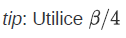

    * 4.5 Estime el mismo modelo con LPM

    

    
    

In [8]:
#1. RECODIFICACION FAMHIST A DUMMY
df['famhist'].value_counts()


Absent     270
Present    192
Name: famhist, dtype: int64

In [9]:
df['famhist_bin'] = np.where(df['famhist']=='Present',1,0)

In [10]:
#2. ESTIMACION DEL MODELO
m1_logit = smf.logit('chd ~ famhist_bin', df).fit() #Antecedentes familiares de enfermedades cardiacas
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Aug 2019   Pseudo R-squ.:                 0.05740
Time:                        00:35:19   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 4.937e-09
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist_bin     1.1690      0.203      5.751      0.000       0.771       1.567
===============================================================================
"""

In [11]:
#log odds
famhist_mean = df['famhist_bin'].mean() #aislar el promedio

estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['famhist_bin']*1)#extraer la combinacion lineal de parametros 1= tienen antecedentes, 0 = sin antecedentes
print("El log odds estimado es de ", round(estimate_y, 5))

El log odds estimado es de  -0.0


In [12]:
# 3.INVERSE LOGIT PARA EL MAPEO DE LOG-ODDS A PROBABILIDAD

def invlogit(x):
    return 1 / (1+ np.exp(-x))

print(invlogit(estimate_y))

0.4999999999999999


In [13]:
# 4. Con el modelo estimado, responda lo siguiente:
# 4.1
P_con_ant = invlogit(m1_logit.params['Intercept'] + (m1_logit.params['famhist_bin']*1))
print("La probabilidad promedio de sufrir una enfermedad coronaria con  antecedentes familiares es: ",round(P_con_ant,2))


La probabilidad promedio de sufrir una enfermedad coronaria con  antecedentes familiares es:  0.5


In [14]:
# 4.2
P_sin_ant = invlogit(m1_logit.params['Intercept'] + (m1_logit.params['famhist_bin'] * 0))
print("La probabilidad promedio de sufrir una enfermedad coronaria sin presentar antecedentes familiares es: ",round(P_sin_ant, 2))

La probabilidad promedio de sufrir una enfermedad coronaria sin presentar antecedentes familiares es:  0.24


In [15]:
# 4.3

print('La diferencia de probabilidades de padecer una enfermedad coronaria entre un individuo con antecedentes y sin antecedentes familiares es: ',round(P_con_ant - P_sin_ant,2))

La diferencia de probabilidades de padecer una enfermedad coronaria entre un individuo con antecedentes y sin antecedentes familiares es:  0.26


In [16]:
#4.4 Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.
m1_ols = smf.ols('chd ~ famhist_bin',df).fit()
m1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sat, 10 Aug 2019   Prob (F-statistic):           2.66e-09
Time:                        00:35:20   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2370      0.028      8.489      0.000       0.182       0.292
famhist_bin     0.2630      0.043      6.071      0.000       0.178       0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ambos modelos se aproximan al mismo resultado, por ejemplo la suma de los valores de los coeficientes del modelo de regresión líneal se aproximan a 0.5 que se puede interpretar, como la probabilidad de ocurrencia, a pesar de que no corresponde a  una probabilidad directa, ya que los modelos de regresión lineal tienen coeficientes que pueden ser superiores al intervalo de probabilidad (0, 1), por está razon se requieren modelos de regresión logística, cuyo inverso de odds arrojó una probabilidad de 0.5, lo que quiere decir que hay un 50 % de probabilidad de sufrir un accidente coronario en caso de que éste presente el antecedente familiar.

### Desafío 3 : Estimacion Completa

Implemente un modelo con la siguiente forma

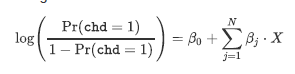


1. Depure el modelo manteniendo las variables con significancia estadística al 95%.
2. Compare los estadísticos de bondad de ajuste entre ambos.
2. Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [17]:
#modelo econometrico
m1_logit = smf.logit('chd ~ sbp + tobacco + ldl + adiposity + typea + obesity + alcohol + age + famhist_bin',df).fit()
m1_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: chd              AIC:              492.1400  
Date:               2019-08-10 00:35 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.1507    1.3083  -4.7015  0.0000  -8.7149  -3.5866
sbp            0.0065    0.0057   1.1350  0.2564  -0.0047   0.0177
tobacco        0.0794    0.0266   2.9838  0.0028   0.0272   0.1315
ldl            0.1739    0.0597   2.9152  0.0036   0.0570   0.2909
adiposity      0.0186    0.0293   0.6346  0.5257  -0.0388   0.0760
typea          0.0396    0.0123   3.2138  0.0013   0.0154   0.0637
obesity       -0.0629    0.0442  -1.4218  0.1551  -0.1496   0.0238
alcohol        0.0001    0.0045   0.0271  0.9784  -0.0087   0.0089
age            0.0452    0.0121   3.7285  0.0002   0.0215   0.0690
famhist_bin    0.9254    0.2279   4.0605  0.0000   0.4787   1.3720
=================================================================

"""

In [18]:
# Extraccion de las variables cuyos p-values son estadisticamente significativos
pvalues = m1_logit.pvalues
print ('Las siguientes variables son estadísticamente significativas: ') 

means_values= pd.Series(pvalues).where(lambda x : x<0.05).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
Intercept      0.000003
tobacco        0.002847
ldl            0.003555
typea          0.001310
age            0.000193
famhist_bin    0.000049
dtype: float64


In [19]:
#log odds en variables significativas -variables categoricas

# caso evaluación = Indidividuo con antecedentes familiares de enf cardiacas =1 

estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['famhist_bin'] * 1)
print("El log odds estimado es de ", round(estimate_y, 3))

El log odds estimado es de  -5.225


Este log odds nos indica que a medida que aumentan el numero de variables el modelo disminuye el impacto de historia familiar en el intercepto de este.

In [20]:
#log odds en variables numéricas

variables= list(means_values.index)
variables.remove('Intercept')
variables.remove('famhist_bin')
for var in variables:
    estimate_y = m1_logit.params['Intercept'] + (m1_logit.params[var] * df[var].mean())
    print("El log odds estimado para ", var, " es de ", round(estimate_y, 3))
   

El log odds estimado para  tobacco  es de  -5.862
El log odds estimado para  ldl  es de  -5.326
El log odds estimado para  typea  es de  -4.048
El log odds estimado para  age  es de  -4.214


Los log odds calculados sobre el impacto de las variables promedio  indican que a medida que aumentan el numero de variables, el modelo disminuye el impacto individual. En este caso las variables edad  y personalidad de tipo A son más influyentes que las variables consumo de tabaco y perfil lipidico.


In [21]:
#modelo con variables significativas
m2_logit = smf.logit('chd ~ + tobacco + ldl  + typea + age + famhist_bin',df).fit()
m2_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2019-08-10 00:35 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
famhist_bin    0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
=================================================================

"""

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas
a probabilidades con inverse_logit . 

Los perfiles a estimar son los siguientes:
* La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
* La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
* La probabilidad de tener una enfemerdad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

1. La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra es:

In [22]:
#modelo con variables significativas
m2_logit = smf.logit('chd ~ + tobacco + ldl  + typea + age + famhist_bin',df).fit()
m2_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2019-08-10 00:35 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
famhist_bin    0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
=================================================================

"""

* La caracteristica mas representativa es no presentar antecedentes familiares, famhist_bin = 0
* un individuo representativo corresponde al promedio de la muestra para las variables depuradas

In [23]:
#log odds
estimate_y_2 =  m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] * 0  + m2_logit.params['tobacco']* df['tobacco'].mean()+\
                 m2_logit.params['ldl'] * df['ldl'].mean() + m2_logit.params['typea'] * df['typea'].mean() + m2_logit.params['age']*df['age'].mean()

print("El log odds estimado es de ", round(estimate_y_2, 5))
   

El log odds estimado es de  -1.25486


In [24]:
m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] * 0  + m2_logit.params['tobacco']* df['tobacco'].mean()
+ m2_logit.params['ldl'] * df['ldl'].mean() + m2_logit.params['typea'] * df['typea'].mean() + m2_logit.params['age']*df['age'].mean()

4.899367991410447

In [25]:
estimate_y_2

-1.2548600144988673

In [26]:
print(invlogit(estimate_y_2))

0.2218599809694638


In [27]:
invlogit(m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] * 0  +  m2_logit.params['tobacco']* df['tobacco'].mean()
+ m2_logit.params['ldl'] * df['ldl'].mean() + m2_logit.params['typea'] * df['typea'].mean() + m2_logit.params['age']*df['age'].mean())

0.2218599809694638

In [38]:
#probabilidad con invlogit
prob_1 = invlogit(m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] * 0  +  m2_logit.params['tobacco']* df['tobacco'].mean()
+ m2_logit.params['ldl'] * df['ldl'].mean() + m2_logit.params['typea'] * df['typea'].mean() + m2_logit.params['age']*df['age'].mean())

print("La probabilidad estimada de tener una enfermedad coronaria para un individuo con características similares a la muestra es ", round(prob_1,4))

La probabilidad estimada de tener una enfermedad coronaria para un individuo con características similares a la muestra es  0.2219


2. La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes es:

In [29]:
# Determinar cuales valores del rango de la muestra se corresponden a un individuo con altos niveles de LDL

df['ldl'].max() # aplicar parametro max.

15.33

In [30]:
# Formulacion del modelo con los valores de los individuos representativos, añadiendo max a LDL

estimate_y_3 = m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] * 0  +  m2_logit.params['tobacco']* df['tobacco'].mean() 
+ m2_logit.params['ldl']* df['ldl'].max() + m2_logit.params['typea']* df['typea'].mean()+ m2_logit.params['age']* df['age'].mean()
print("El log odds estimado es de ", round(estimate_y_3, 5))

El log odds estimado es de  -6.15423


In [31]:
#print(invlogit(estimate_y_3))  

In [32]:
#probabilidad con invlogit
prob_2 = invlogit(m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] * df['famhist_bin'].mode()  +  m2_logit.params['tobacco']* df['tobacco'].mean()
+ m2_logit.params['ldl']*df['ldl'].max() + m2_logit.params['typea']*df['typea'].mean()+ m2_logit.params['age']*df['age'].mean())

print("La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes es: ", round(prob_2,4))

La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes es:  0    0.6132
dtype: float64


-La probabilidad de un individuo con altos niveles de LDL y el resto de las variables constantes, de padecer un accidente coronario es aproximadamente  0.6132

3. La probabilidad de tener una enfemedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes es:

In [33]:
#Determinar cuales valores del rango de la muestra se corresponden a un individuo con bajos niveles de LDL

df['ldl'].min() # aplicamos el parametro min.

0.98

In [34]:
# Formulacion del modelo con los valores de los individuos representativos, añadiendo min a LDL

estimate_y_4 = m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] * df['famhist_bin'].mode()  +  m2_logit.params['tobacco']*df['tobacco'].mean()
+ m2_logit.params['ldl'].min() + m2_logit.params['typea']*df['typea'].mean()+ m2_logit.params['age']*df['age'].mean()

print("El log odds estimado es de ", round(estimate_y_4, 5))

El log odds estimado es de  0   -6.15423
dtype: float64


In [35]:
invlogit(-6.15423)

0.0021199723715011705

In [36]:
#probabilidad con invlogit

prob_3 = invlogit(m2_logit.params['Intercept'] +  m2_logit.params['famhist_bin'] *df['famhist_bin'].mode()  +  m2_logit.params['tobacco']*df['tobacco'].mean() 
+ m2_logit.params['ldl']*df['ldl'].min() + m2_logit.params['typea']*df['typea'].mean()+ m2_logit.params['age']*df['age'].mean())

print("La probabilidad de tener una enfemedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes es: ", round(prob_3,4))

La probabilidad de tener una enfemedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes es:  0    0.1342
dtype: float64


-La probabilidad de un individuo  con bajos niveles de LDL y el resto de las variables constantes, de padecer una enfermedad coronaria es 0.1342, es decir, es menor que la probabilidad de un individuo con altos niveles de LDL, los cuales presentan un 0.6132 de probabilidad.